# Default Risk Rating with Machine Learning

## Applied Statistics

## Problem


A financial company asks you to perform a default risk rating. They have data about historic customer  behaviour at  the  time  of  the  loan  application. Before  they  award  new  loans, they predict the default risk based on this information. You  get  access  to  detailed  data  about 250,000 loans.  The  data  contains socio-economic characteristics,  employment  information,  and  wealth  status.  Furthermore,  you  observe whether a loan of the customer defaulted in the past or not. Your task as data analyst is to predict the default risk. For this purpose, you can use classical estimation  methods  and  more  advanced unsupervised  machine  learning  methods. The ultimate goal is to develop a tool, that enables the financial company to measure default risk in an easy interpretable way.


DATA :

- Microdata from internal records of the financial company.

- The data comprises information on past defaults, income, age, experience, marital status, property, employment, and residency.

- Additional data about  the  business  cycle  can  be  merged  based  on  regional information.



INDICATIVE BIBLIOGRAPHY

G.James, T.Hastie, D.Witten, R.J.Tibshirani (2021): An Introduction to Statistical Learning: With Applications in R, 2nd edition, Springer, https://www.statlearning.com/ 


### Framing the problem

...    

## Getting the data

In [3]:
import pandas as pd
import numpy as np
import copy as c
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sns

In [4]:
with open(r"data/description.txt") as f:
    contents = f.read()
    print(contents)

CONTEXT
An organization wants to predict who possible defaulters are for the consumer loans product. 
They have data about historic customer behavior based on what they have observed. 
Hence when they acquire new customers they want to predict who is riskier and who is not.

CONTENT
All values were provided at the time of the loan application.

Column			Description					Type
income			Income of the user				int
age			Age of the user					int
experience		Professional experience of the user in years	int
profession		Profession					string
married			Whether married or single			string
house_ownership		Owned or rented or neither			string
car_ownership		Does the person own a car			string
risk_flag		Defaulted on a loan				string
currentjobyears		Years of experience in the current job		int
currenthouseyears	Number of years in the current residence	int
city			City of residence				string
state			State of residence				string

The risk_flag indicates whether there has been a default in the past or not.


In [5]:
data=pd.read_csv(r"data/default data.csv")
data = data.set_index('Id')
data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0


In [6]:
data.sample(10)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
235761,4751624,70,6,single,rented,no,Petroleum_Engineer,Nagercoil,Tamil_Nadu,6,10,0
109682,4393965,47,5,single,rented,no,Scientist,Sri_Ganganagar,Rajasthan,5,14,0
218170,4085169,28,6,single,owned,no,Drafter,Salem,Tamil_Nadu,5,11,1
249169,3076886,79,11,single,rented,no,Consultant,Korba,Chhattisgarh,10,14,1
39633,2362103,56,2,single,rented,no,Dentist,Mathura,Uttar_Pradesh,2,11,1
77974,8199311,66,3,married,rented,yes,Financial_Analyst,Aligarh,Uttar_Pradesh,3,13,0
216687,3724188,74,7,single,rented,no,Dentist,Bhubaneswar,Odisha,7,10,1
36450,2113243,63,8,single,rented,no,Geologist,Gandhinagar,Gujarat,7,10,0
106868,7526244,25,20,single,rented,no,Statistician,Jaipur,Rajasthan,13,10,0


## Data preparation

We need to standard scale numerical attributes.

In [7]:
# full db
num_attribs = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
cat_attribs = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

In [29]:
# selected features
num_attribs = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
cat_attribs = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
                                    ])

df = full_pipeline.fit_transform(data).toarray()
risk_flag = np.asarray(data['Risk_Flag']).astype('float32')

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, risk_flag, test_size=0.1)

X_val = X_train[:50000]
X_ptrain = X_train[50000:]
y_val = y_train[:50000]
y_ptrain = y_train[50000:]

## Building the model

### Model architecture and compilation

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [33]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Model validation
#### Training on test data

In [34]:
history = model.fit(X_ptrain,
                    y_ptrain,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
346/346 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8743 - val_loss: 0.3499 - val_accuracy: 0.8767
Epoch 2/20
346/346 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8776 - val_loss: 0.3273 - val_accuracy: 0.8793
Epoch 3/20
346/346 [==============================] - 1s 2ms/step - loss: 0.3122 - accuracy: 0.8810 - val_loss: 0.3079 - val_accuracy: 0.8832
Epoch 4/20
346/346 [==============================] - 1s 2ms/step - loss: 0.2926 - accuracy: 0.8854 - val_loss: 0.2936 - val_accuracy: 0.8856
Epoch 5/20
346/346 [==============================] - 1s 2ms/step - loss: 0.2783 - accuracy: 0.8878 - val_loss: 0.2836 - val_accuracy: 0.8858
Epoch 6/20
346/346 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.8899 - val_loss: 0.2765 - val_accuracy: 0.8862
Epoch 7/20
346/346 [==============================] - 1s 2ms/step - loss: 0.2599 - accuracy: 0.8917 - val_loss: 0.2713 - val_accuracy: 0.8896
Epoch 

#### Results

In [35]:
results = model.evaluate(X_test, y_test)
results

788/788 [==============================] - 1s 774us/step - loss: 0.2397 - accuracy: 0.8962


[0.23973272740840912, 0.896230161190033]

#### Training and validation loss plots

In [42]:
def plot_loss(history):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.figure()
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

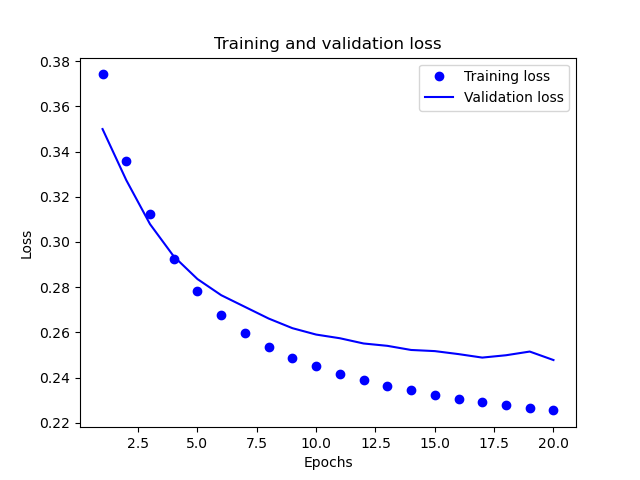

In [43]:
plot_loss(history)

#### Training and validation accuracy plots

In [83]:
def plot_acc(history):
    history_dict = history.history
    acc = history_dict["accuracy"]
    epochs = range(1, len(acc) + 1)
    val_acc = history_dict["val_accuracy"]
    plt.figure()
    plt.plot(epochs, acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "b", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

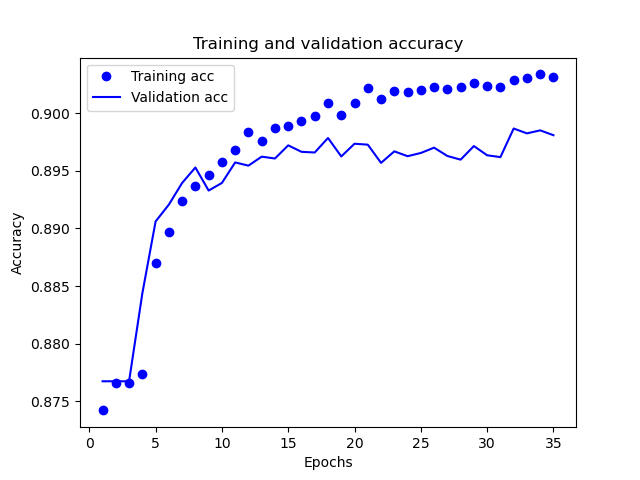

In [84]:
plot_acc(history)

#### Retraining a slightly different model

In [77]:
from tensorflow.keras import regularizers
from tensorflow.keras import metrics

In [78]:
model = keras.Sequential([
    layers.Dense(256,
                 #kernel_regularizer=regularizers.l1(0.001),
                 activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(128,
                 #kernel_regularizer=regularizers.l1(0.001),
                 activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32,
                 #kernel_regularizer=regularizers.l1(0.001),
                 activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=[
                  "accuracy",
                  metrics.Recall()
              ])

history = model.fit(X_ptrain, y_ptrain, epochs=35, batch_size=512, validation_data=(X_val, y_val))

results = model.evaluate(X_test, y_test)

Epoch 1/35
346/346 [==============================] - 3s 6ms/step - loss: 0.4067 - accuracy: 0.8742 - recall: 0.0029 - val_loss: 0.3916 - val_accuracy: 0.8767 - val_recall: 0.0000e+00
Epoch 2/35
346/346 [==============================] - 2s 5ms/step - loss: 0.3575 - accuracy: 0.8765 - recall: 0.0000e+00 - val_loss: 0.3601 - val_accuracy: 0.8767 - val_recall: 0.0000e+00
Epoch 3/35
346/346 [==============================] - 2s 5ms/step - loss: 0.3234 - accuracy: 0.8765 - recall: 0.0000e+00 - val_loss: 0.3371 - val_accuracy: 0.8767 - val_recall: 0.0000e+00
Epoch 4/35
346/346 [==============================] - 2s 5ms/step - loss: 0.2944 - accuracy: 0.8773 - recall: 0.0143 - val_loss: 0.2822 - val_accuracy: 0.8844 - val_recall: 0.1451
Epoch 5/35
346/346 [==============================] - 2s 5ms/step - loss: 0.2764 - accuracy: 0.8870 - recall: 0.2368 - val_loss: 0.2753 - val_accuracy: 0.8906 - val_recall: 0.3815
Epoch 6/35
346/346 [==============================] - 2s 5ms/step - loss: 0.2629

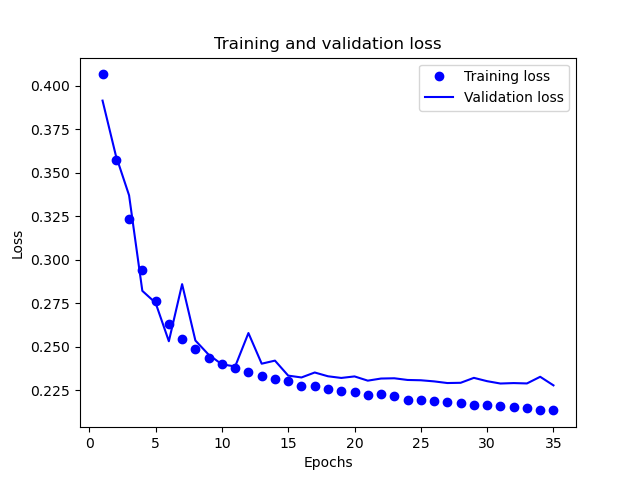

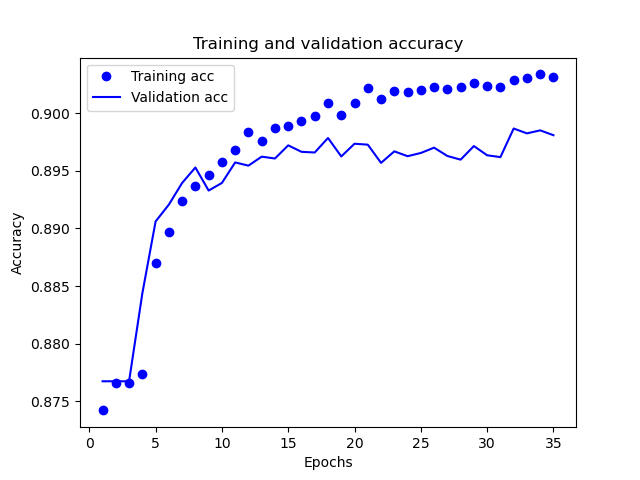

In [85]:
plot_loss(history)
plot_acc(history)

#### Prediction

In [98]:
model.predict(X_test)

array([[0.06240547],
       [0.01008469],
       [0.2658739 ],
       ...,
       [0.02959237],
       [0.09557971],
       [0.01045671]], dtype=float32)

In [80]:
history_dict["accuracy"]

[0.8743212819099426,
 0.8776131272315979,
 0.8810350894927979,
 0.8853676319122314,
 0.8878337144851685,
 0.8899490833282471,
 0.8917421102523804,
 0.8935916423797607,
 0.8946323394775391,
 0.8954638242721558,
 0.8959898352622986,
 0.8969400525093079,
 0.8975622057914734,
 0.897839367389679,
 0.8988122344017029,
 0.8988348245620728,
 0.8994004726409912,
 0.8992930054664612,
 0.8999490737915039,
 0.9002658128738403]